# Train Model

In [1]:
from comet_ml import Experiment
from pytorch_lightning.loggers import CometLogger
from src import datasets
import torch
from architectures import *
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import torchvision
from pytorch_lightning.loggers import MLFlowLogger

%config Completer.use_jedi = False

In [ ]:
root = "dataset2014/dataset/baseline/office/groundtruth/"
train_dataset = datasets.ImageData("dataset2014/dataset/baseline/office/input/")
test_dataset = datasets.ImageData("dataset2014/dataset/baseline/highway/input/")
show = transforms.ToPILImage()

In [ ]:
val_lenth = 100
test_dataset, val_dataset = torch.utils.data.random_split(test_dataset, [len(test_dataset)-100,100])
len(train_dataset),len(test_dataset),len(val_dataset)

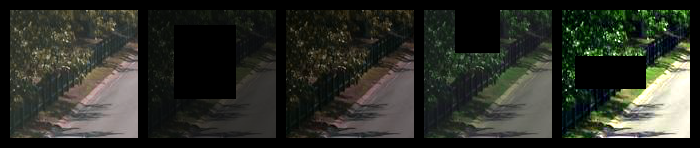

In [4]:
x,y  = test_dataset[98]
show = transforms.ToPILImage()
showSeq = lambda xs: [show(x.squeeze(0)) for x in torch.split(xs,1)]
#showSeq(x)
grid = torchvision.utils.make_grid(x, nrow=10, padding=10)
show(grid)

In [5]:
comet_logger = CometLogger(
    api_key="tMEjeyq5M7v1IPRCvS5fyGyuo",
    workspace="semjon", # Optional
    project_name="deep-sequences", # Optional
    # rest_api_key=os.environ["COMET_REST_KEY"], # Optional
    save_dir='.',
    experiment_name="test" # Optional
)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset)
val_loader = DataLoader(val_dataset, batch_size=10)


agg_params = { 
    "num_heads":8,
    "dim_feedforward":128,
    "num_layers":3
}
net = DeepAggNet(planes=16,agg_block="Attention",agg_params=agg_params)
trainer = pl.Trainer(gpus=1,logger=comet_logger)

CometLogger will be initialized in online mode
GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [6]:
trainer.fit(net, train_loader, val_dataloaders=val_loader)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/semjon/deep-sequences/53903733060e46d6ac1e674efa3bc98c


  | Name       | Type                 | Params
----------------------------------------------------
0 | input      | Conv2d               | 448   
1 | output     | Conv2d               | 435   
2 | downsample | Sequential           | 23.1 K
3 | upsample   | Sequential           | 23.1 K
4 | encoder    | Sequential           | 738 K 
5 | agg        | AttentionAggregation | 100 K 
6 | decoder    | Sequential           | 738 K 
7 | smooth     | Sequential           | 32.5 K
----------------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.628     Total estimated model params size (MB)


Epoch 0:  95%|███████████████████████████████████████████▊  | 205/215 [01:16<00:03,  2.67it/s, loss=0.0154, v_num=c98c]
Validating: 0it [00:00, ?it/s]
Epoch 1:  96%|████████████████████████████████████████████  | 206/215 [01:17<00:03,  2.67it/s, loss=0.0105, v_num=c98c]
Validating: 0it [00:00, ?it/s]
Epoch 2:  96%|███████████████████████████████████████████  | 206/215 [01:17<00:03,  2.67it/s, loss=0.00764, v_num=c98c]
Validating: 0it [00:00, ?it/s]
Epoch 3:  96%|███████████████████████████████████████████  | 206/215 [01:18<00:03,  2.61it/s, loss=0.00545, v_num=c98c]
Validating: 0it [00:00, ?it/s]
Epoch 4:  96%|███████████████████████████████████████████  | 206/215 [01:19<00:03,  2.61it/s, loss=0.00441, v_num=c98c]
Validating: 0it [00:00, ?it/s]
Epoch 5:  96%|███████████████████████████████████████████  | 206/215 [01:18<00:03,  2.62it/s, loss=0.00365, v_num=c98c]
Validating: 0it [00:00, ?it/s]
Epoch 6:  96%|███████████████████████████████████████████  | 206/215 [01:19<00:03,  2.60it/s, 

C:\Users\simon\AppData\Local\Continuum\anaconda3\envs\DL\lib\site-packages\pytorch_lightning\utilities\distributed.py:50: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/semjon/deep-sequences/53903733060e46d6ac1e674efa3bc98c
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [1457]      : (0.0006618525949306786, 0.25683531165122986)
COMET INFO:     train_loss [291] : (0.0007733634556643665, 0.1270359754562378)
COMET INFO:     val_loss [71]    : (0.012842896394431591, 0.05453266203403473)
COMET INFO:   Others:
COMET INFO:     Name : test
COMET INFO:   Parameters:
COMET INFO:     agg_block          : Mean
COMET INFO:     decoder_num_blocks : 10
COMET INFO:     dim_feedforward    :

COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: Still uploading 2 file(s)


1

In [7]:
import torchvision

dataset = torchvision.datasets.ImageFolder("dataset2014/dataset/baseline/highway/")
x,y = dataset[2001]
X = []

# Test whether aggregation moduls have correct dimensionality:
$ f : \mathcal{P}\left( \mathbb{R}^{(B \times C \times H \times W)} \right) \rightarrow \mathbb{R}^{(B \times C \times H \times W)} $ 

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from architectures import *
from torch.utils.tensorboard import SummaryWriter
%config Completer.use_jedi = False

In [9]:
S,B,C,H,W = 10, 5, 64, 256, 256    # Sequence length, Batch size, Channels, Height, Width
x = torch.rand(B, S, 3, H, W).cuda()

agg_params = { 
    "num_heads":8,
    "dim_feedforward":128,
    "num_layers":3
}
net = DeepAggNet(planes=16,agg_block="Attention",agg_params=agg_params).cuda()
#net = DeepAggNet()
net(x).size()

torch.Size([5, 3, 256, 256])